Basic Data Visualizations Using the Iris Flower Dataset. 

In [104]:
#This tutorial was adapted from Zach Gold and Ben Hamner via Kaggle. The examples have been modified to match the teaching objectives of this lecture

#We will be using pandas for loading the csv file into a dataframe
import pandas as pd

#matplotlib is a python library for basic graph plotting
import matplotlib.pyplot as plt

#seaborn is another python graphing library that is built upon matplotlib and allows you to optimize matplotlib's output
import seaborn as sns 

#switching from matplotlib's default graphing style to that of seaborn's. Seaborn displays graph lines, matplotlib doesn't
sns.set(color_codes = True)

#removing warnings from the output
import warnings
warnings.filterwarnings("ignore")

Loading the csv file into the pandas dataframe

In [105]:
flowers = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [106]:
flowers

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Taking a peek at the dataset

In [107]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Finding how many records we have for each species 


In [108]:
flowers["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Making a scatterplot from using methods from within pandas! No need for matplotlib or seaborn!


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Width vs Height')

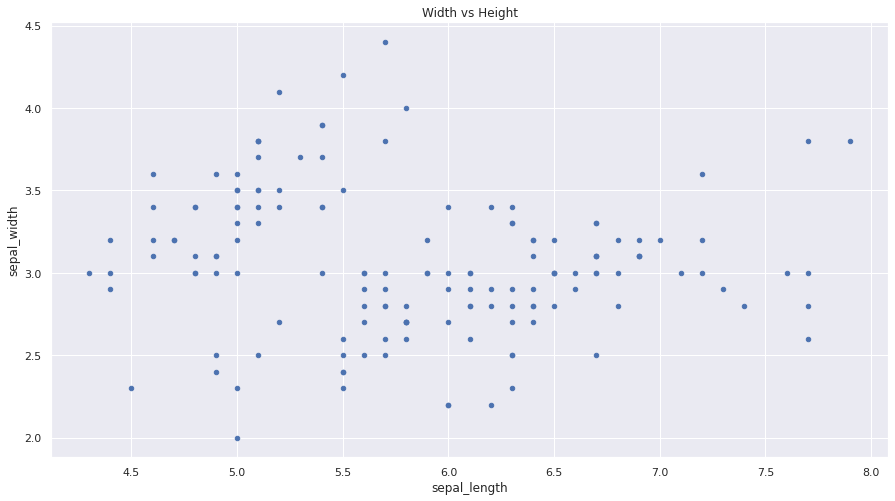

In [109]:
flowers.plot(kind='scatter', x = 'sepal_length', y = 'sepal_width')
plt.title('Width vs Height')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Length vs Width')

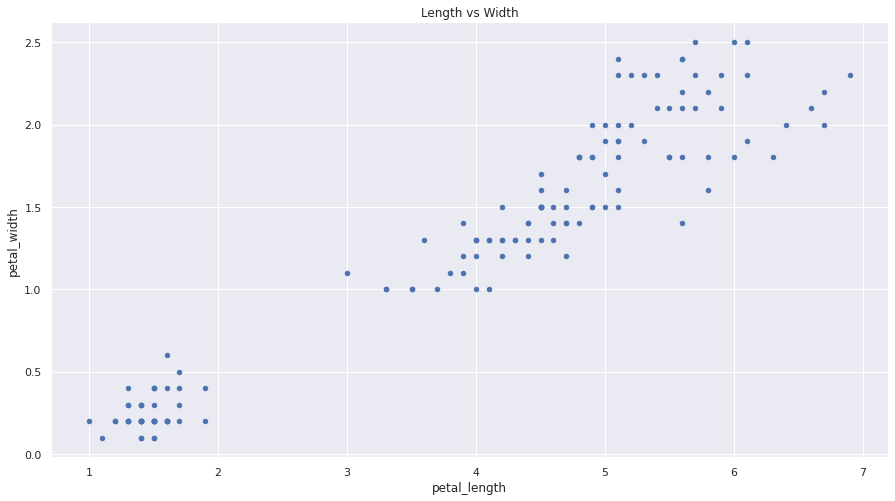

In [110]:
flowers.plot(kind='scatter', x = 'petal_length', y = 'petal_width')
plt.title('Length vs Width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


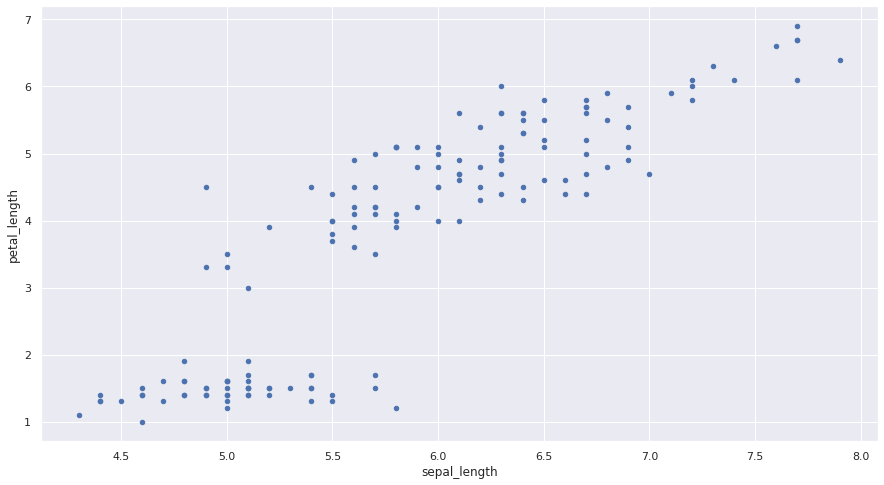

In [103]:
#plot sepal length vs petal length
flowers.plot(kind='scatter', x = 'sepal_length', y = 'petal_length')
plt.show()

Let's use seaborn to creating a jointplot with bivariate scatterplots and histograms within the same figure.


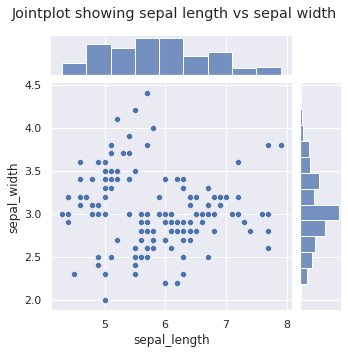

In [ ]:
rp=sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = flowers, size =5)
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle('Jointplot showing sepal length vs sepal width')
plt.show()


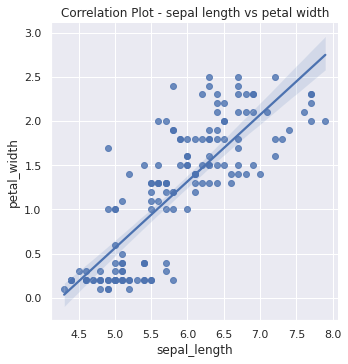

In [ ]:
sns.lmplot(x='sepal_length', y='petal_width', data=flowers).set(title='Correlation Plot - sepal length vs petal width')



plt.show()

The following line of code can be used to adjust the dimensions of your seaborn plot. 

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})


The previous scatterplots do not differentiate among the species. Let's use seaborn's FacetGrid to indicate which points belong to the various species. 

hue - represents the column which we wish to give each unique record a different color

palette - represents the color scheme that is used.

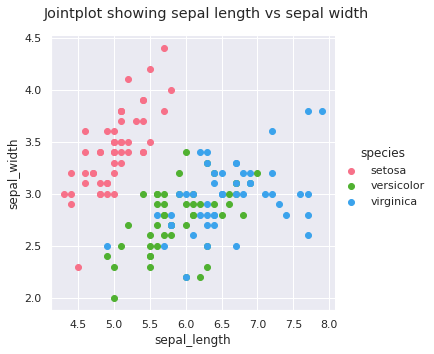

In [ ]:
rp=sns.FacetGrid(flowers, hue='species', palette='husl', size=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle('Jointplot showing sepal length vs sepal width')
plt.show()

Experiment with different color palettes. Check out the seaborn documentation here: https://seaborn.pydata.org/tutorial/color_palettes.html

Let's create a boxplot!

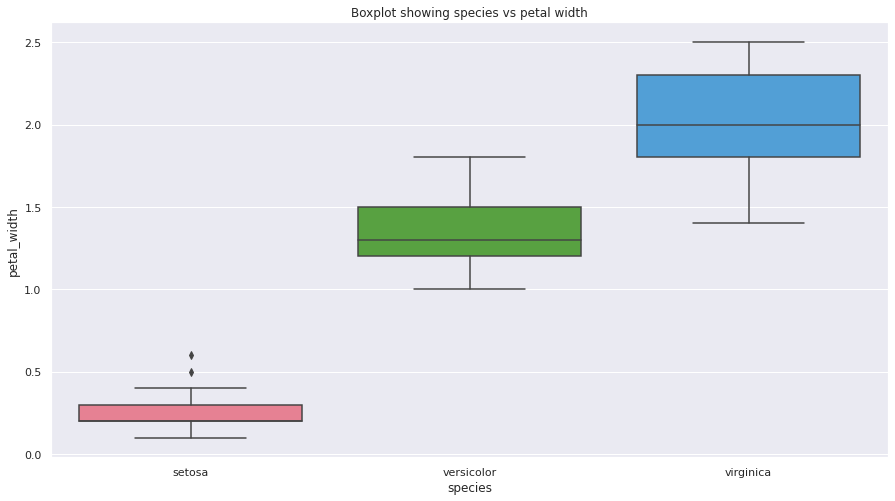

In [ ]:
sns.boxplot(x='species', y='petal_width', palette='husl', data=flowers).set(title='Boxplot showing species vs petal width')
plt.show()

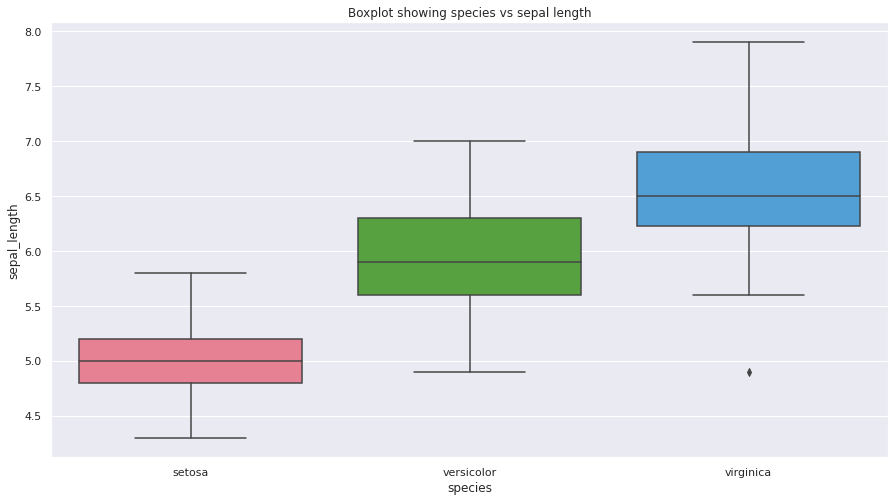

In [ ]:
sns.boxplot(x='species', y ='sepal_length', palette='husl', data = flowers).set(title='Boxplot showing species vs sepal length')
plt.show()

How about a violin plot?! Violin plots show the density of the data at various primary splits. The denser sections are thicker than the sparse ones.

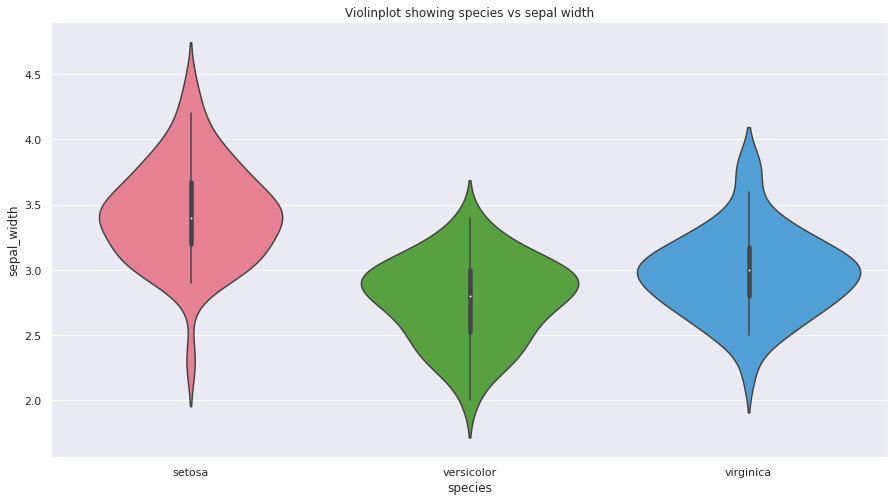

In [ ]:
sns.violinplot(x='species', y='sepal_width', palette='husl', data=flowers).set(title='Violinplot showing species vs sepal width')
plt.show()


Violin plot with the datapoints overlayed on the figures. This gives us a better idea of the data distribution. 

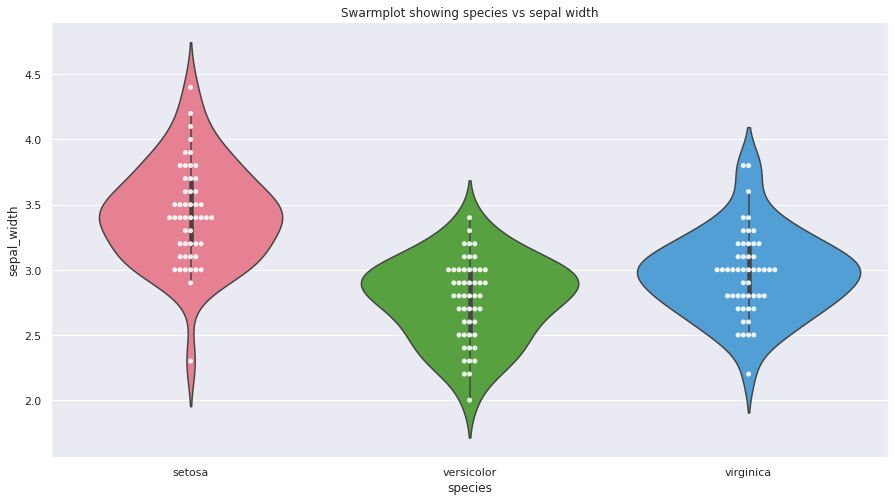

In [ ]:
#plotting a violin plot
sns.violinplot(x= 'species', y='sepal_width', palette='husl', data=flowers)

#plotting a swarm plot on top of the violin plot
sns.swarmplot(x='species', y='sepal_width', data=flowers, color='w', alpha=.9).set(title='Swarmplot showing species vs sepal width')
plt.show();


Kdeplot - great for looking at univariate relations. This visualizes the kernel density estimate of the underlying feature. The higher a line on the y-axis, the denser the data is at that x-axis number

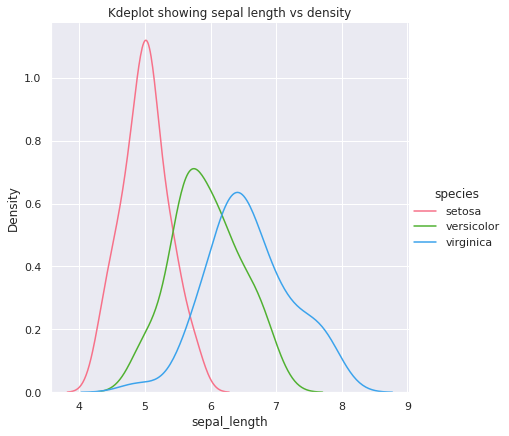

In [ ]:
sns.FacetGrid(flowers, hue='species', palette='husl', size=6).map(sns.kdeplot, 'sepal_length').add_legend().set(title='Kdeplot showing sepal length vs density')
plt.show()

Pairplot - depicts the bivariate relation between each pair of features. 

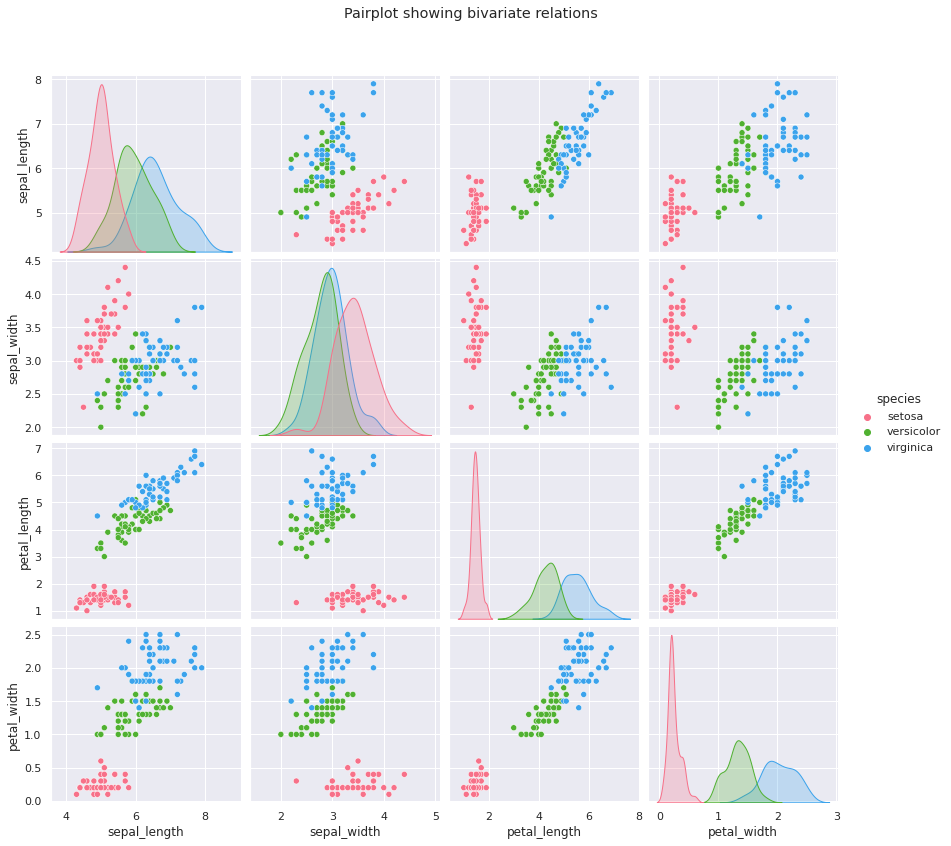

In [ ]:
rp = sns.pairplot(flowers, hue='species', palette='husl', size=3)
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp

rp.fig.suptitle('Pairplot showing bivariate relations')
plt.show()

As we have seen earlier, we can create plots from with Pandas itself. Let's explore some more!

A heatmap showing correlation

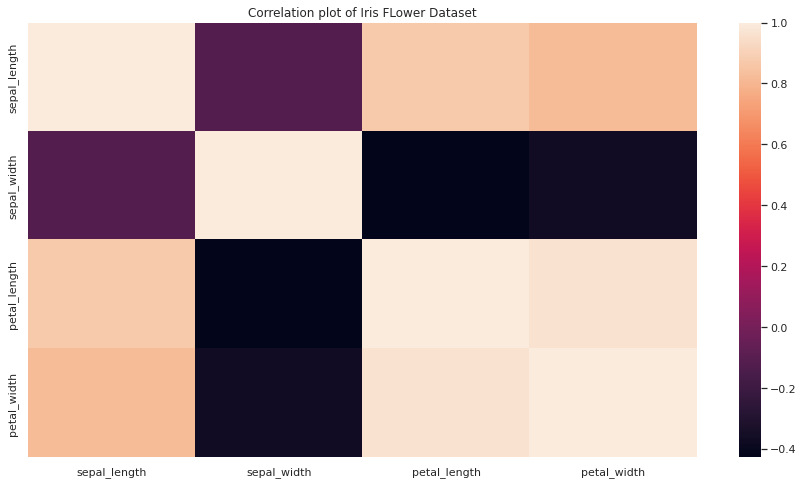

In [ ]:

corr = flowers.corr()
 
# Heatmap
sns.heatmap(corr).set(title='Correlation plot of Iris FLower Dataset')
plt.show()

Histogram

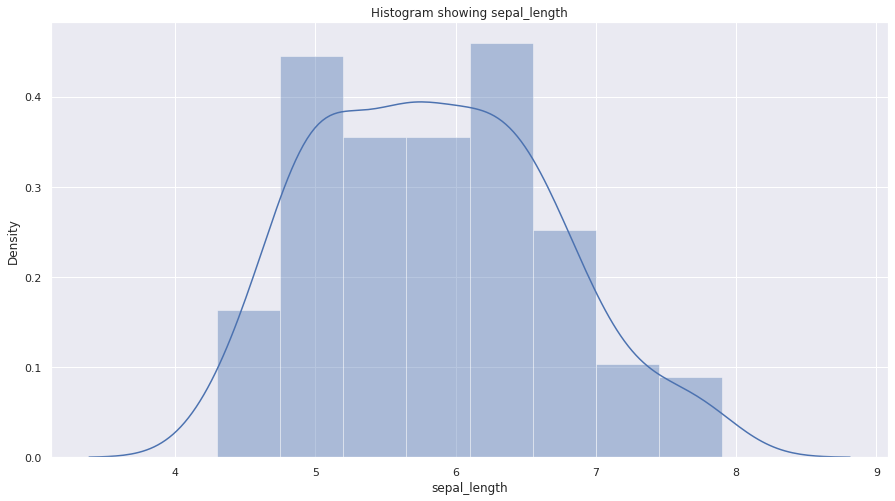

In [ ]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(flowers['sepal_length']).set(title='Histogram showing sepal_length')
plt.show()

Basic Countplot (Barplot)


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

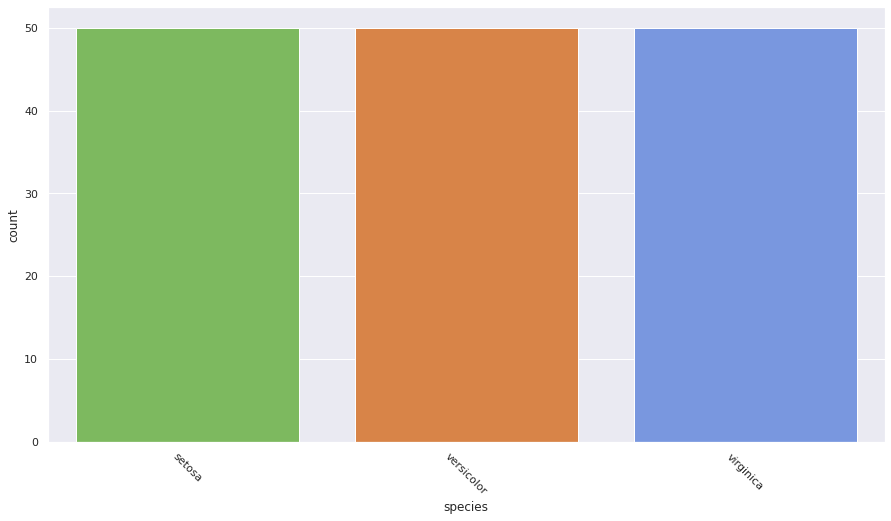

In [ ]:
colors = ['#78C850', '#F08030','#6890F0']
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='species', data=flowers, palette=colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

Factor Plot

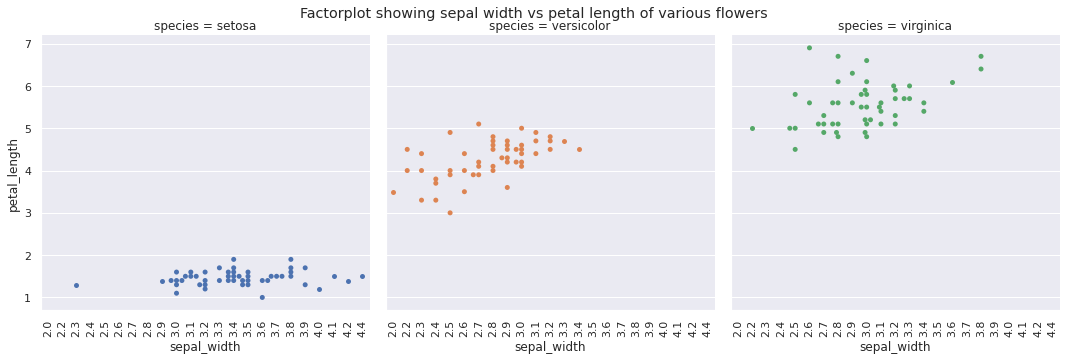

In [ ]:

# Factor Plot
rp = sns.factorplot(x='sepal_width', 
                   y='petal_length', 
                   data=flowers, 
                   hue='species',  # Color by species
                   col='species',  # Separate by species
                   kind='swarm')  # Swarmplot
 
# Rotate x-axis labels
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp

rp.set_xticklabels(rotation=90)
rp.fig.suptitle('Factorplot showing sepal width vs petal length of various flowers')
plt.show()
 

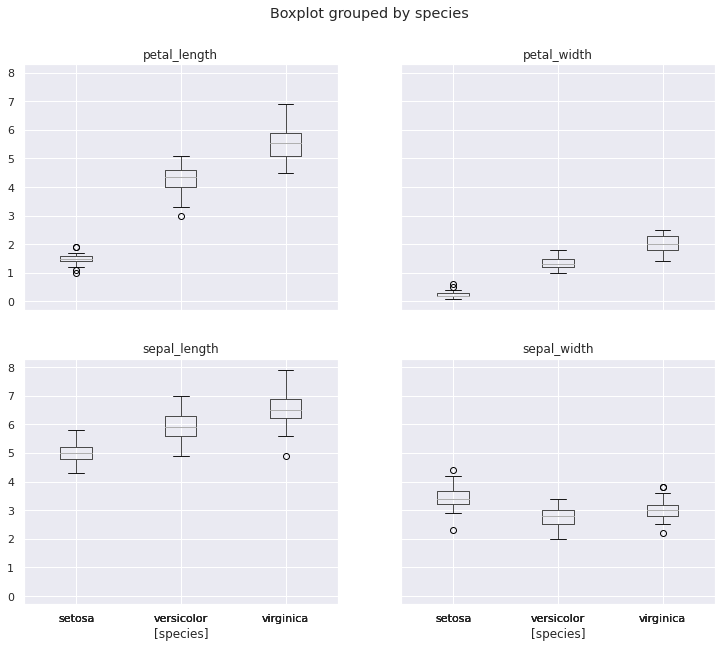

In [ ]:
#boxplot - via pandas

flowers.boxplot(by='species', figsize=(12, 10))
plt.show()

Parallel Coordinates allows us to see each feature in a separate column and the connecting features for each data sample

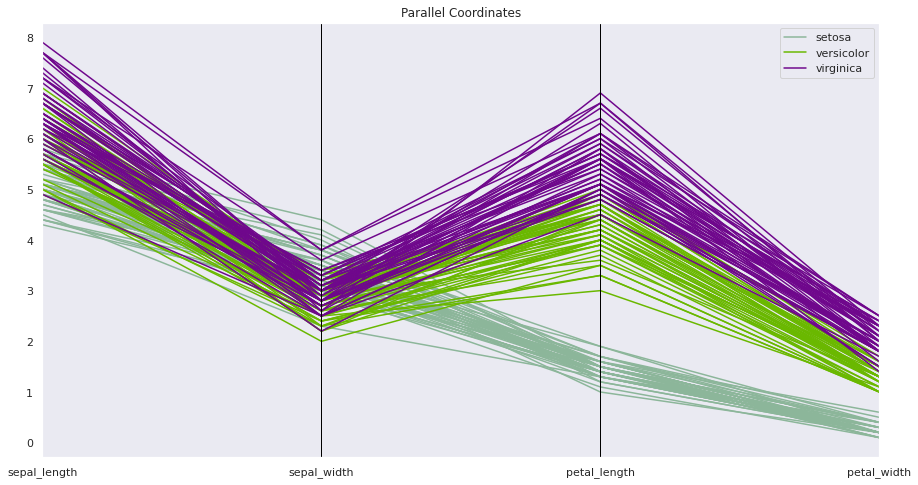

In [ ]:

from pandas.plotting import parallel_coordinates
parallel_coordinates(flowers, 'species')
plt.title('Parallel Coordinates')
plt.show()